## AutoEncoders:
 are used for Dimensionality Reduction and Noise Removal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0)

In [3]:
y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [4]:
#we need to have a 3rd dimension:
z= np.random.normal(size=len(X))
z

array([-1.43986120e+00, -4.21940782e-01,  9.36010517e-01, -1.20480983e+00,
       -4.86669388e-02,  8.01944769e-01,  6.29992261e-01,  6.94561867e-01,
        2.62287530e+00, -5.81551011e-01,  3.12950297e-01,  1.48229880e+00,
       -4.71204086e-02, -6.89727780e-01, -1.40861323e+00,  1.11512647e+00,
        8.09562913e-01,  3.54452528e-01,  3.36942649e-01, -2.53312719e-01,
        2.28872355e+00, -8.51203187e-01,  6.37735493e-01, -1.01317853e+00,
       -2.03873562e+00,  9.72869165e-01, -5.87257663e-01,  1.14576135e-01,
       -4.91458311e-01, -4.18107250e-02,  7.91336545e-01,  4.21259412e-01,
        1.26581823e+00,  7.39799893e-01,  1.59352109e+00, -2.05958120e+00,
       -1.31479476e-01,  3.33599808e-01, -7.25849544e-01,  1.78444744e-01,
        1.32421852e+00,  1.57278813e+00,  1.21203886e-01,  1.66190415e+00,
       -1.77116538e-01,  8.81087748e-01,  8.16349649e-01,  1.80178781e+00,
        6.07445871e-02, -1.47355007e+00, -1.35658732e-02,  9.99929310e-01,
        2.97274910e-01,  

In [5]:
z=pd.Series(z)

In [6]:
feat= pd.DataFrame(X)
feat= pd.concat([feat,z],axis=1)

In [7]:
feat.columns=['X1', 'X2', 'X3']
feat.head()

,X1,X2,X3
0,-5.143292,-7.052384,-1.439861
1,-0.966194,2.700058,-0.421941
2,-1.204087,2.951134,0.936011
3,-0.582592,1.225137,-1.204810
4,-4.145552,-5.991329,-0.048667


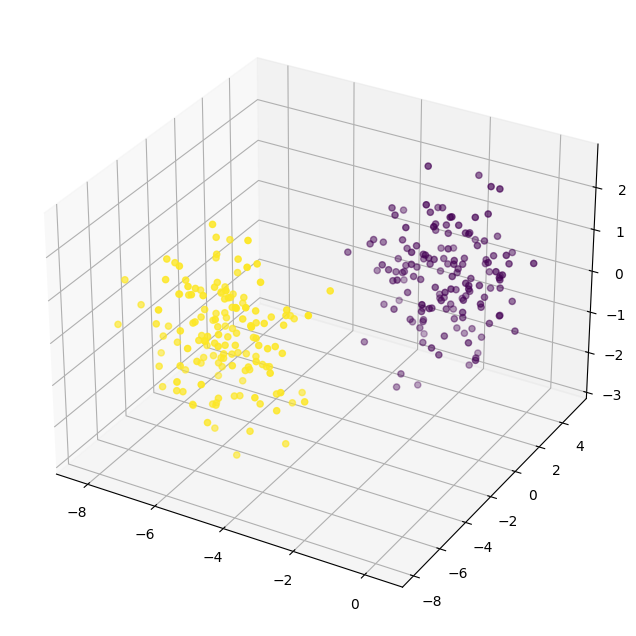

In [8]:
#now we'll use autoencoder to figure out the important features/columns of this dataframe
#lets plot it in 3d:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)
plt.show()

Encoder and Decoder:

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [10]:
#scaling our data, we'll use the entire dataset as it is unsupervised learning
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [11]:
#encoder:
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=[3]))

#decoder:
decoder = Sequential()
decoder.add(Dense(3, activation='relu', input_shape=[2]))

#autoencoder:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [12]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 3ms/step - loss: 0.3566
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.3312
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3312
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3312
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3312


In [13]:
#now for dimentionality reduction we should use encoder 
encoded_dim = encoder.predict(scaled_data)
print('actual dim:', scaled_data.shape,'\n', 'dimentionality reduction', encoded_dim.shape)

10/10 [==============================] - 0s 7ms/step
actual dim: (300, 3) 
 dimentionality reduction (300, 2)


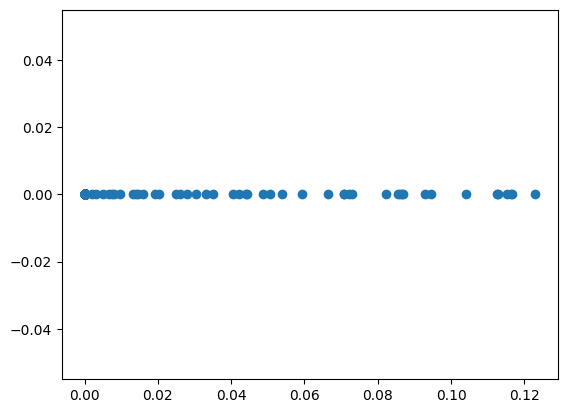

In [15]:
plt.scatter(encoded_dim[:, 0], encoded_dim[:, 1])
plt.show()